
# Two Directions? Wikipedia Edits of Harry Styles and Louis Tomlinson (2012-2024)

In [45]:
print(dir(functions))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


**Mimi Chen, Jennifer Gossen, Gian Jaeger, Ami Kashimna, Matttéo Larrodé**

*Oxford Internet Institute, MSc Social Data Science, Fundamentals of Python*

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import powerlaw
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import lognorm
from scipy.stats import expon, kstest
from scipy.stats import mannwhitneyu
import re
import sys
import importlib
import functions
sns.set()

In [117]:
sys.path.append('path/to/functions')
importlib.reload(functions)

<module 'functions' from 'path/to/function.py'>

In [30]:
harry_styles = pd.read_feather('/path/to/feather/file')
louis_tomlinson = pd.read_feather('/path/to/feather/file')

In [31]:
harry_styles.sort_values(by='timestamp', inplace=True)
harry_styles

,revision_id,timestamp,username,userid,comment,text_length,text,year,month
2015,388629425,2010-10-04 07:08:11+00:00,Werldwayd,4571676,From band member to band,72,#REDIRECT [[List of The X Factor finalists (UK...,2010,10
2014,389138205,2010-10-06 17:41:49+00:00,AnemoneProjectors,1597144,None,91,#REDIRECT [[List of The X Factor finalists (UK...,2010,10
3358,408146834,2011-01-16 04:29:48+00:00,None,None,None,215,#REDIRECT [[List of The X Factor finalists (UK...,2011,01
3359,408146979,2011-01-16 04:31:11+00:00,None,None,None,124,"Harry Styles was born on February 1, 1994, in...",2011,01
3360,408156850,2011-01-16 06:07:44+00:00,Malcolmxl5,4076676,"rv back to redirect. Was a short, unsourced b...",91,#REDIRECT [[List of The X Factor finalists (UK...,2011,01
...,...,...,...,...,...,...,...,...,...
982,1252113413,2024-10-19 21:09:15+00:00,Changedforbetter,14933977,added [[Category:English baritones]] using [[W...,267248,{{Short description|English singer (born 1994)...,2024,10
987,1252183310,2024-10-20 06:05:17+00:00,Btspurplegalaxy,34911881,Restored back as the group never disbanded,267250,{{Short description|English singer (born 1994)...,2024,10
983,1253598266,2024-10-26 21:23:14+00:00,Breaktheicees,33552663,/* 2010–2015: The X Factor and One Direction *...,267186,{{Short description|English singer (born 1994)...,2024,10
988,1253598598,2024-10-26 21:25:44+00:00,Breaktheicees,33552663,/* 2010–2015: The X Factor and One Direction *...,267119,{{Short description|English singer (born 1994)...,2024,10


In [26]:
louis_tomlinson.sort_values(by='timestamp', inplace=True)
louis_tomlinson

,revision_id,timestamp,username,userid,comment,text_length,year,month
1076,388629228,2010-10-04 07:06:46+00:00,Werldwayd,4571676,From band member to band,72,2010,10
1075,389138247,2010-10-06 17:42:05+00:00,AnemoneProjectors,1597144,None,91,2010,10
1665,441480777,2011-07-26 06:13:53+00:00,AsheyRenee2012,14994641,[[WP:AES|←]]Redirected page to [[One Direction]],27,2011,07
1664,441496825,2011-07-26 08:57:37+00:00,AsheyRenee2012,14994641,[[WP:AES|←]]Blanked the page,0,2011,07
1663,441557243,2011-07-26 16:30:39+00:00,AnemoneProjectors,1597144,[[Help:Reverting|Reverted]] edits by [[Special...,91,2011,07
...,...,...,...,...,...,...,...,...
428,1251843861,2024-10-18 12:00:39+00:00,Miklogfeather,42151856,Commonly called a former member by sources,124581,2024,10
432,1251953342,2024-10-19 00:47:30+00:00,Beatlemania2002,43781123,Unexplained removal,124596,2024,10
435,1252183543,2024-10-20 06:07:09+00:00,Btspurplegalaxy,34911881,Restored back as the group never disbanded,124588,2024,10
430,1252442052,2024-10-21 11:04:08+00:00,Starklinson,30021739,None,124590,2024,10


### H1: Going viral on social media leads to an increase in Wikipedia page revisions

*Theoretical Background: Unexpected viral events enhance users’ engagement, reactivating the collective response process (Sangiorgio et al., 2024)*


To visualise the temporal trends in Wikipedia revisions, we first aggregated the data on a monthly level and then applied a 3-month rolling average. This approach was chosen as using monthly data alone or applying a rolling average to daily data resulted in too much noise. Since we are interested in looking at major changes in revisions over the time period, this method allows us to smooth out short-term fluctuations while capturing big career/solo events more clearly. 

/var/folders/0j/y4frtl3n1lz6fyxggzsfg8680000gn/T/ipykernel_4356/1797852578.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  harry_styles['month'] = harry_styles['timestamp'].dt.to_period('M')
/var/folders/0j/y4frtl3n1lz6fyxggzsfg8680000gn/T/ipykernel_4356/1797852578.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  louis_tomlinson['month'] = louis_tomlinson['timestamp'].dt.to_period('M')


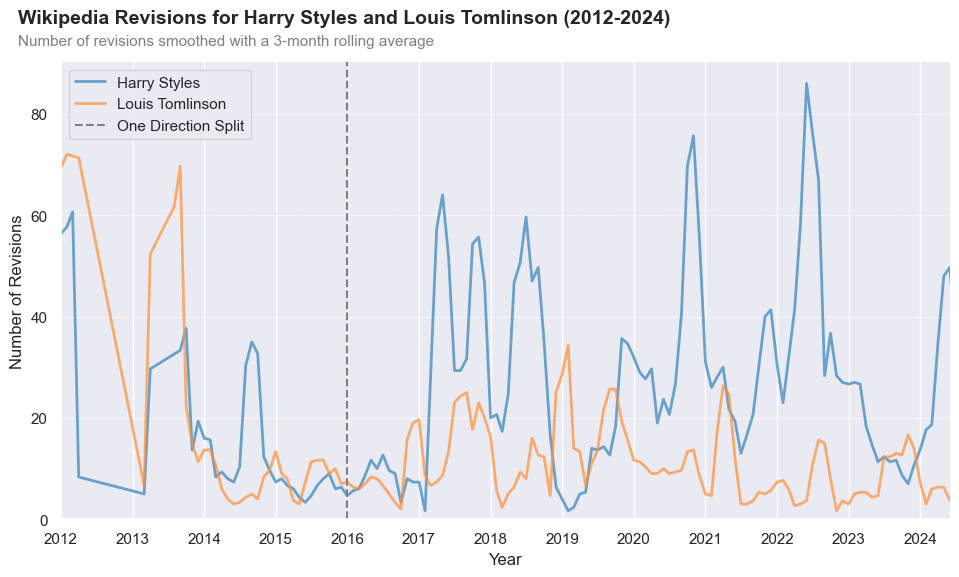

In [3]:
harry_styles['month'] = harry_styles['timestamp'].dt.to_period('M')
louis_tomlinson['month'] = louis_tomlinson['timestamp'].dt.to_period('M')

agg_harry_monthly_total = harry_styles.groupby('month').size().rolling(window=3, center=True).mean()
agg_louis_monthly_total = louis_tomlinson.groupby('month').size().rolling(window=3, center=True).mean()

# 2. Plotting
plt.figure(figsize=(10,6))
plt.plot(agg_harry_monthly_total.index.to_timestamp(), agg_harry_monthly_total,
         label='Harry Styles', color='#3382ba', linewidth=2, alpha=0.7)
plt.plot(agg_louis_monthly_total.index.to_timestamp(), agg_louis_monthly_total,
         label='Louis Tomlinson', color='#ff8f37', linewidth=2, alpha=0.7)

plt.suptitle('Wikipedia Revisions for Harry Styles and Louis Tomlinson (2012-2024)',
             fontsize=14, fontweight='bold', y=0.96, x=0.05, ha='left')
plt.text(0.05, 0.90, 'Number of revisions smoothed with a 3-month rolling average',
       fontsize=11, ha='left', transform=plt.gcf().transFigure, color='gray')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Revisions', fontsize=12)

# 3. Set x-axis formatting and limits
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start='2012-01-01', end='2024-06-01', freq='YS'))
plt.xlim(left=pd.Timestamp('2012-01-01'), right=pd.Timestamp('2024-06-01'))
plt.ylim(bottom=0)

# 4. Add vertical line at January 2016
plt.axvline(pd.Timestamp('2016-01-01'), color='grey', linestyle='--', linewidth=1.5, label='One Direction Split')

# 5. Grid, spine adjustments, and legend
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### H2: The distribution of contributors’ edits follows a power law distribution

**Power-law and Kolmogorov-Smirnov Goodness of Fit Test for Commits per User**

Here we create a function to visualize how well a power-law distribution fits our empirical dataset, specifically by plotting the Probability Density Function (PDF) and Cumulative Distribution Function (CDF) of the data alongside the fitted power-law model. 

Calculating best minimal value for power law fit


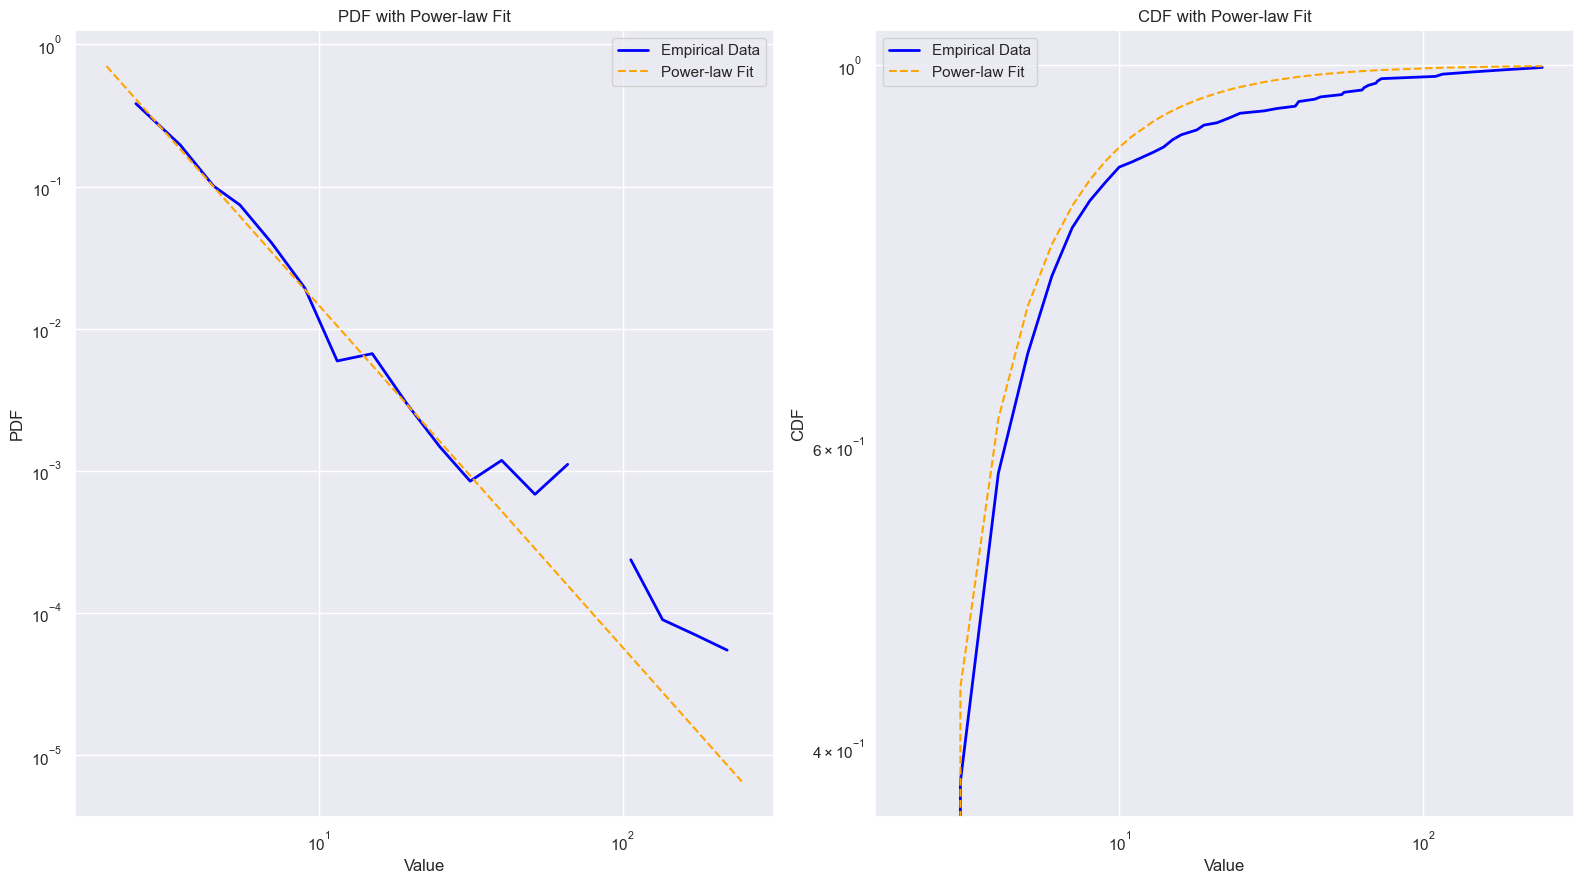

Calculating best minimal value for power law fit


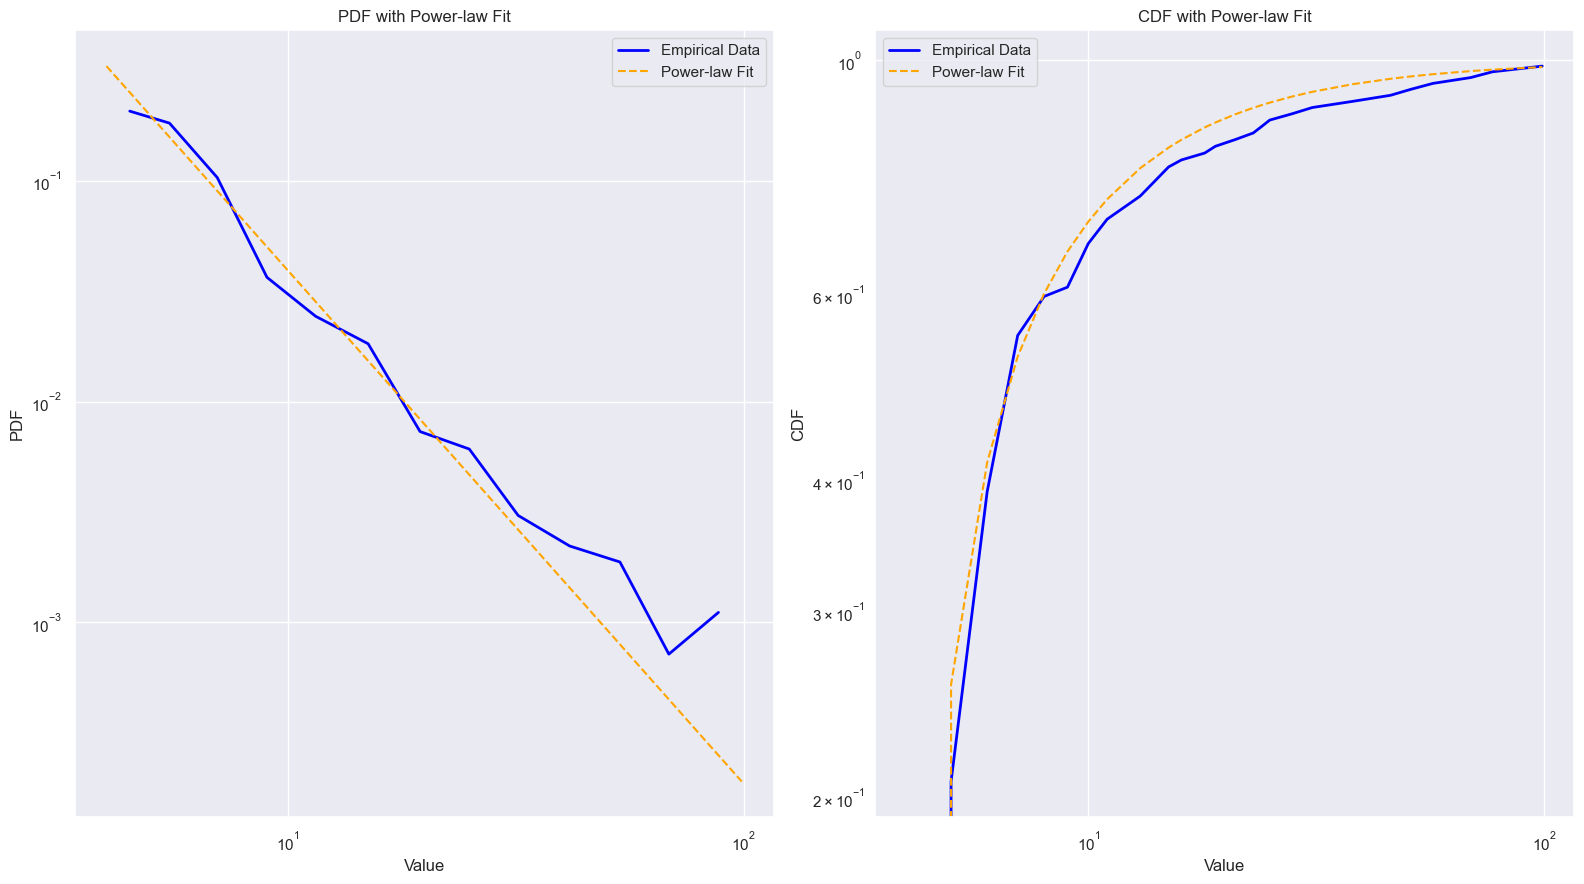

In [64]:
functions.plot_data(harry_styles['userid'].value_counts())
functions.plot_data(louis_tomlinson['userid'].value_counts())

**KS Goodness of Fit Test with Power-law fit for Harry Styles**

Calculating best minimal value for power law fit


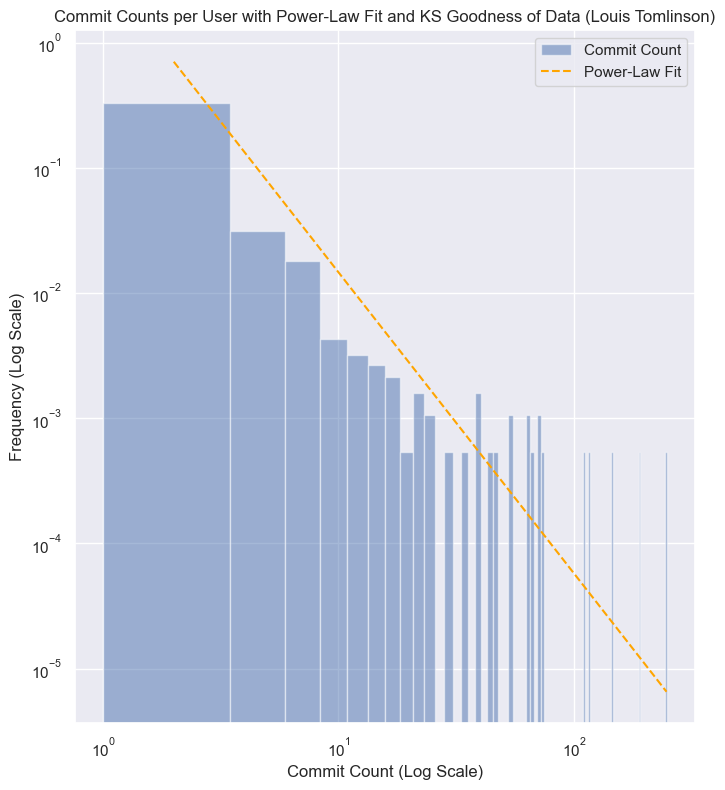

In [65]:
functions.fit_powerlaw(harry_styles)

**KS Goodness of Fit Test with Power-law fit for Louis Tomlinson**

Calculating best minimal value for power law fit


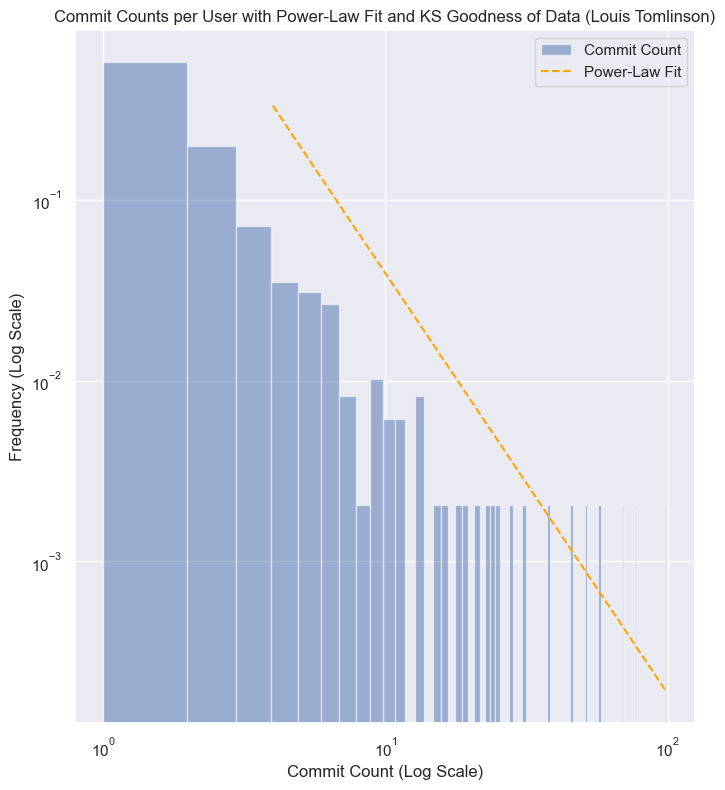

In [66]:
functions.fit_powerlaw(louis_tomlinson)

### H3: ‘Superfans’ write longer revisions than casual contributors 

In [72]:
compressed_harry, filtered_harry, superfans_harry = functions.find_superfans(harry_styles)
print(superfans_harry['superfan'].value_counts())

superfan
False    717
True      44
Name: count, dtype: int64


In [73]:
compressed_louis, filtered_louis, superfans_louis = functions.find_superfans(louis_tomlinson)
print(superfans_louis['superfan'].value_counts())

superfan
False    472
True      25
Name: count, dtype: int64


In [74]:
print("Harry Styles edit_size statistics:")
print(compressed_harry['edit_size'].describe())

print("\nLouis Tomlinson edit_size statistics:")
print(compressed_louis['edit_size'].describe())


Harry Styles edit_size statistics:
count     2010.000000
mean       132.963682
std       1574.118392
min     -23367.000000
25%        -14.000000
50%          4.000000
75%        100.000000
max      23367.000000
Name: edit_size, dtype: float64

Louis Tomlinson edit_size statistics:
count     1020.000000
mean       122.147059
std       1836.159768
min     -22778.000000
25%        -11.000000
50%          9.000000
75%        106.250000
max      22778.000000
Name: edit_size, dtype: float64


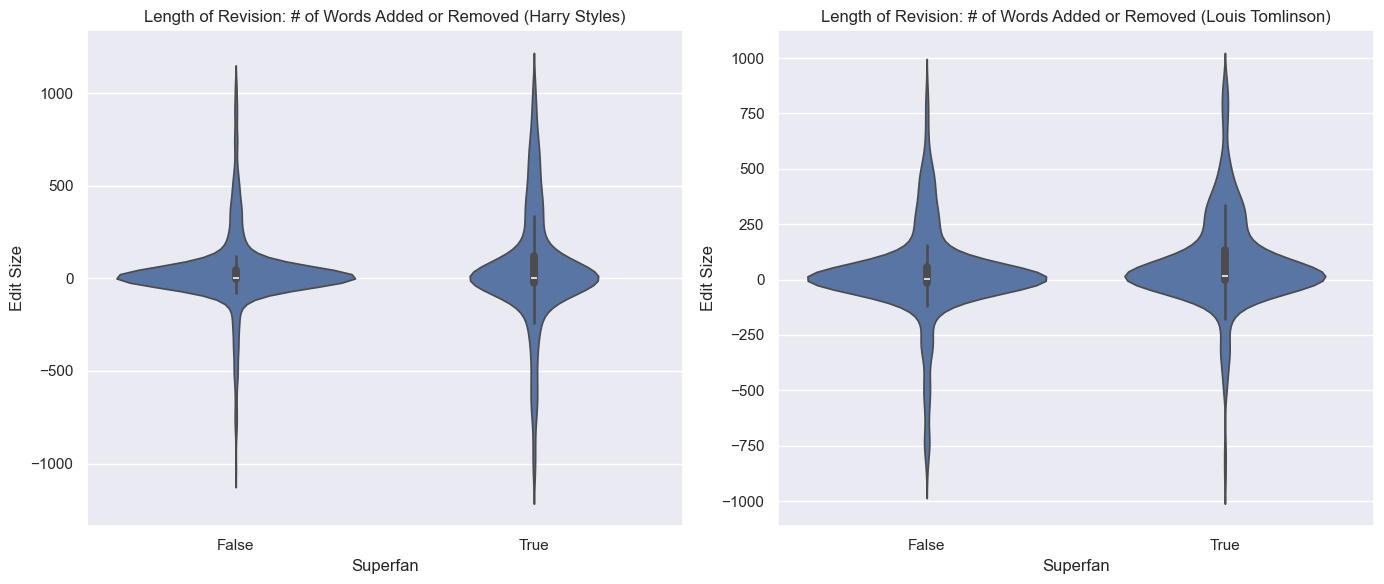

In [75]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Violin plot for edit size for superfans vs non-superfans (Harry Styles)
sns.violinplot(ax=axes[0], x='superfan', y='edit_size', data=filtered_harry)
axes[0].set_title('Length of Revision: # of Words Added or Removed (Harry Styles)')
axes[0].set_xlabel('Superfan')
axes[0].set_ylabel('Edit Size')

# Violin plot for edit size for superfans vs non-superfans (Louis Tomlinson)
sns.violinplot(ax=axes[1], x='superfan', y='edit_size', data=filtered_louis)
axes[1].set_title('Length of Revision: # of Words Added or Removed (Louis Tomlinson)')
axes[1].set_xlabel('Superfan')
axes[1].set_ylabel('Edit Size')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

**Exploring cumulative revisions**

In [80]:
harry_styles_cumulative = functions.cummulative_edits(compressed_harry)
louis_tomlinson_cumulative = functions.cummulative_edits(compressed_louis)

/Users/mimichen/Desktop/OII/Fundamentals/Notebooks/twodirections_wiki/functions.py:139: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
/Users/mimichen/Desktop/OII/Fundamentals/Notebooks/twodirections_wiki/functions.py:139: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.


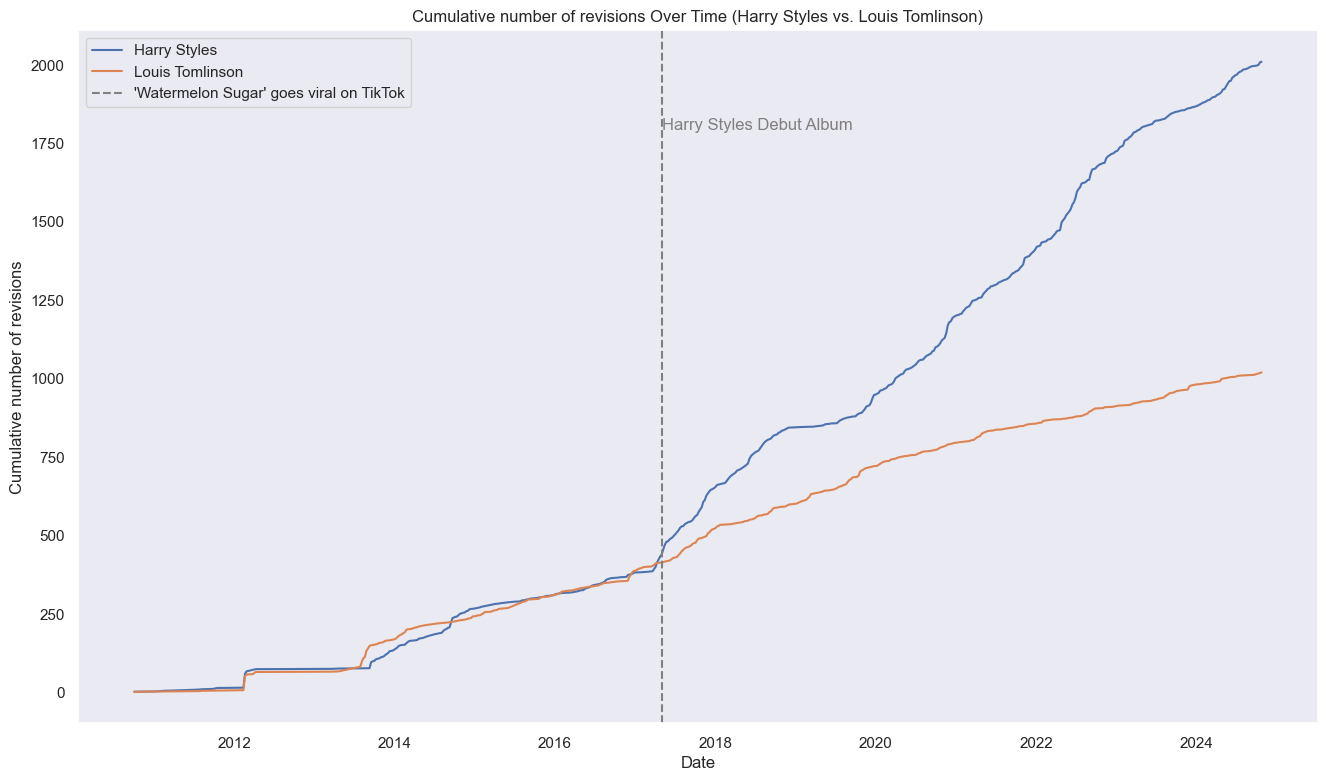

In [83]:
# Line graph to represent the lenght of the wikipedia page using the 'text_length' column (Harry Styles)

# Create figure
plt.figure(figsize=(16,9))
highlight_date = pd.Timestamp('2017-05-01')
# Populate with 'text_length' for Harry Styles
plt.plot(harry_styles_cumulative['2W_period'], harry_styles_cumulative['cumulative_revisions'], label='Harry Styles')

# Populate with 'text_length' for Louis Tomlinson
plt.plot(louis_tomlinson_cumulative['2W_period'], louis_tomlinson_cumulative['cumulative_revisions'], label='Louis Tomlinson')

# Watermelon Sugar Blows up on TikTok
plt.axvline(x=highlight_date, color='gray', linestyle='--', label="'Watermelon Sugar' goes viral on TikTok")
plt.text(highlight_date, max(harry_styles_cumulative['cumulative_revisions']) * 0.9, 
"Harry Styles Debut Album", color='gray', rotation=0, verticalalignment='center')

# Add title, labels and legend
plt.title('Cumulative number of revisions Over Time (Harry Styles vs. Louis Tomlinson)')
plt.xlabel('Date')
plt.grid(False)
plt.ylabel('Cumulative number of revisions')
plt.legend()
plt.show()

**Harry Styles**

In [84]:
# Separate edit sizes for superfans and non-superfans
superfan_edits = compressed_harry[compressed_harry['superfan'] == True]['edit_size']
non_superfan_edits = compressed_harry[compressed_harry['superfan'] == False]['edit_size']

# Mann-Whitney U Test
mann_whitney_result = mannwhitneyu(superfan_edits, non_superfan_edits, alternative='two-sided')
print("Mann-Whitney U Test")
print(f"U statistic: {mann_whitney_result.statistic}, p-value: {mann_whitney_result.pvalue}")

Mann-Whitney U Test
U statistic: 507955.0, p-value: 0.8209552865530976


**Louis Tomlinson**

In [85]:
# Separate edit sizes for superfans and non-superfans
superfan_edits = compressed_louis[compressed_louis['superfan'] == True]['edit_size']
non_superfan_edits = compressed_louis[compressed_louis['superfan'] == False]['edit_size']

# Mann-Whitney U Test
mann_whitney_result = mannwhitneyu(superfan_edits, non_superfan_edits, alternative='two-sided')
print("Mann-Whitney U Test")
print(f"U statistic: {mann_whitney_result.statistic}, p-value: {mann_whitney_result.pvalue}")

Mann-Whitney U Test
U statistic: 141456.5, p-value: 5.63364304008905e-07


With adjusted data frame for just "additions" to the page

In [86]:
# New dataframe with merely "additions" - remove columns where edit_size is negative or 0
additions_harry = compressed_harry[compressed_harry['edit_size'] > 0]
additions_louis = compressed_louis[compressed_louis['edit_size'] > 0]

In [87]:
# Average addition size for superfans vs non superfans

# Harry
print(additions_harry[additions_harry['superfan'] == True]['edit_size'].mean())
print(additions_harry[additions_harry['superfan'] == False]['edit_size'].mean())

# Louis
print(additions_louis[additions_louis['superfan'] == True]['edit_size'].mean())
print(additions_louis[additions_louis['superfan'] == False]['edit_size'].mean())

636.027027027027
325.59669421487604
411.4153225806452
475.9008042895442


In [88]:
# Separate edit sizes for superfans and non-superfans
superfan_edits = additions_harry[additions_harry['superfan'] == True]['edit_size']
non_superfan_edits = additions_harry[additions_harry['superfan'] == False]['edit_size']

# Mann-Whitney U Test
mann_whitney_result = mannwhitneyu(superfan_edits, non_superfan_edits, alternative='two-sided')
print("Mann-Whitney U Test")
print(f"U statistic: {mann_whitney_result.statistic}, p-value: {mann_whitney_result.pvalue}")

Mann-Whitney U Test
U statistic: 215563.0, p-value: 5.987229599830148e-17


In [89]:
# Separate edit sizes for superfans and non-superfans
superfan_edits = additions_louis[additions_louis['superfan'] == True]['edit_size']
non_superfan_edits = additions_louis[additions_louis['superfan'] == False]['edit_size']

# Mann-Whitney U Test
mann_whitney_result = mannwhitneyu(superfan_edits, non_superfan_edits, alternative='two-sided')
print("Mann-Whitney U Test")
print(f"U statistic: {mann_whitney_result.statistic}, p-value: {mann_whitney_result.pvalue}")

Mann-Whitney U Test
U statistic: 52897.0, p-value: 0.0024075619064826393


### Difference in Difference Analysis 

**Step 1: Preprocessing**

In [95]:
harry_styles_biweekly = functions.prepare_biweekly_data(harry_styles)
louis_tomlinson_biweekly = functions.prepare_biweekly_data(louis_tomlinson)

/Users/mimichen/Desktop/OII/Fundamentals/Notebooks/twodirections_wiki/functions.py:163: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
/Users/mimichen/Desktop/OII/Fundamentals/Notebooks/twodirections_wiki/functions.py:163: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.


In [96]:
harry_styles_biweekly.head()

,2W_period,revisions,cumulative_revisions
0,2010-10-04,2,2
1,2011-01-10,3,5
2,2011-02-14,3,8
3,2011-05-16,4,12
4,2011-07-25,3,15


In [97]:
# Add artist identifier
harry_styles_biweekly['pageId'] = 'Harry Styles'
louis_tomlinson_biweekly['pageId'] = 'Louis Tomlinson'

# Concatenate both datasets for ease of analysis
final_df = pd.concat([harry_styles_biweekly, louis_tomlinson_biweekly])

final_df.describe()

,2W_period,revisions,cumulative_revisions
count,856,856.000000,856.000000
mean,2019-01-26 23:04:29.158878464,6.127336,1413.155374
min,2010-10-04 00:00:00,1.000000,2.000000
25%,2016-05-16 00:00:00,2.000000,664.750000
50%,2019-03-28 12:00:00,3.000000,1299.500000
75%,2021-11-30 18:00:00,7.000000,1775.250000
max,2024-10-21 00:00:00,183.000000,3469.000000
std,NaN,11.022100,888.270406


**Step 2: Create Treatment and Post-Treatment Indicators, and define interaction term**

In [98]:
# Define treatment start date
# For now: release of 'Fine Line' on December 13th, 2019
treatment_date = pd.Timestamp('2019-12-13')

# Indicator for treatment group (1 for Harry Styles, 0 for Louis Tomlinson)
final_df['treatment_group'] = np.where(final_df['pageId'] == 'Harry Styles', 1, 0)

# Indicator for post-treatment period (1 if after or on December 2019, else 0)
final_df['post_treatment'] = np.where(final_df['2W_period'] >= treatment_date, 1, 0)

# Interaction term for DiD
final_df['did'] = final_df['treatment_group'] * final_df['post_treatment']

final_df.head()

,2W_period,revisions,cumulative_revisions,pageId,treatment_group,post_treatment,did
0,2010-10-04,2,2,Harry Styles,1,0,0
1,2011-01-10,3,5,Harry Styles,1,0,0
2,2011-02-14,3,8,Harry Styles,1,0,0
3,2011-05-16,4,12,Harry Styles,1,0,0
4,2011-07-25,3,15,Harry Styles,1,0,0


In [99]:
# Run the DiD regression model
model = smf.ols('cumulative_revisions ~ treatment_group + post_treatment + did', data=final_df).fit()

# Print the results summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     cumulative_revisions   R-squared:                       0.788
Model:                              OLS   Adj. R-squared:                  0.787
Method:                   Least Squares   F-statistic:                     1056.
Date:                  Mon, 28 Oct 2024   Prob (F-statistic):          2.22e-286
Time:                          13:05:57   Log-Likelihood:                -6361.9
No. Observations:                   856   AIC:                         1.273e+04
Df Residuals:                       852   BIC:                         1.275e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         743.

#### Key Variables and Coefficients

Intercept (743.9489): This is the estimated baseline cumulative revisions for the control group (Louis Tomlinson) before the treatment (release of Fine Line). It shows that, in the pre-treatment period, Louis Tomlinson’s Wikipedia page had an average of 743 cumulative revisions at each biweekly interval.

treatment_group (96.6184): This coefficient represents the baseline difference in cumulative revisions between Harry Styles (treatment group) and Louis Tomlinson (control group) before the release of Fine Line. On average, Harry Styles’ Wikipedia page had about 96.6 more cumulative revisions than Louis Tomlinson’s page in the pre-treatment period. The p-value (0.010) is statistically significant, indicating that this difference is unlikely due to random chance.

post_treatment (798.6405): This coefficient indicates the overall effect on cumulative revisions for the control group (Louis Tomlinson) after the release of Fine Line. It suggests that, regardless of being in the treatment group, cumulative revisions increased by about 798.6 revisions in the post-treatment period, likely due to general external factors affecting both pages. This effect is highly significant (p < 0.001), meaning it’s statistically likely that cumulative revisions increased for both pages in the post-treatment period.

did (1005.8547): This is the difference-in-differences (DiD) estimator, capturing the additional effect of Fine Line’s release on cumulative revisions for Harry Styles’ page specifically. The positive and significant coefficient (1005.9, with a p-value < 0.001) indicates that cumulative revisions on Harry Styles’ page increased by approximately 1005.9 more than they would have without the album release. This coefficient suggests a substantial impact of the album release on engagement with Harry Styles’ Wikipedia page, above and beyond the general increase observed on Louis Tomlinson’s page.

#### Model Summary Statistics

R-squared (0.788): This value indicates that the model explains about 78.8% of the variance in cumulative revisions. This high R-squared value suggests a good fit to the data. F-statistic and Prob

(F-statistic): The high F-statistic and extremely low p-value (9.34e-286) show that the model is statistically significant overall, meaning it explains a meaningful amount of variance in cumulative revisions.

#### Interpretation Summary

The results suggest that Harry Styles’ page had a modestly higher baseline cumulative activity compared to Louis Tomlinson’s before the treatment. Both pages experienced a general increase in revisions in the post-treatment period. However, the release of Fine Line led to an additional significant increase in cumulative revisions on Harry Styles’ Wikipedia page, estimated to be around 1005.9 revisions, which is beyond what would be expected based on general trends.

### Lexical Analysis 

**H1: The word album being mentioned in the comment for revisions corresponds with spikes in the number of revisions for the wikipedia pages**

In [17]:
#num of rows in the dataset
harry_styles.head()

,revision_id,timestamp,username,userid,comment,text_length,text,year,month
985,1253692008,2024-10-27 11:04:36+00:00,Goodreg3,26110720,Adding tags for clarification on such bold sta...,267257,{{Short description|English singer (born 1994)...,2024,10
988,1253598598,2024-10-26 21:25:44+00:00,Breaktheicees,33552663,/* 2010–2015: The X Factor and One Direction *...,267119,{{Short description|English singer (born 1994)...,2024,10
983,1253598266,2024-10-26 21:23:14+00:00,Breaktheicees,33552663,/* 2010–2015: The X Factor and One Direction *...,267186,{{Short description|English singer (born 1994)...,2024,10
987,1252183310,2024-10-20 06:05:17+00:00,Btspurplegalaxy,34911881,Restored back as the group never disbanded,267250,{{Short description|English singer (born 1994)...,2024,10
982,1252113413,2024-10-19 21:09:15+00:00,Changedforbetter,14933977,added [[Category:English baritones]] using [[W...,267248,{{Short description|English singer (born 1994)...,2024,10


In [14]:
louis_tomlinson.shape[0]

1776

In [18]:
print(harry_styles['comment'][3459])

/* Solo projects and hiatus */ his acting in the film Dunkirk.


In [19]:
print(harry_styles['text'][3459])

{{pp-blp|indef=yes|small=yes}}
{{Use dmy dates|date=November 2015}}
{{Use British English|date=January 2014}}
{{Infobox musical artist  <!--See WP:WikiProject Musicians-->
| name            = Harry Styles
| image           = Harry Styles November 2014.jpg
| caption         = Styles at the [[ARIA Music Awards of 2014|ARIA Music Awards]] in 2014
| image_size      = 200px
| background      = solo_singer
| birth_name      = Harry Edward Styles
| birth_date      = {{Birth date and age|1994|02|1|df=yes}}
| birth_place     = [[Redditch]], [[Worcestershire]],<ref name="Redditch Standard">{{cite web|url=http://www.redditchstandard.co.uk/2014/01/03/news-Harry-Styles-born-in-Redditch-confirmed-93738.html |title=Harry Styles born in Redditch - confirmed |publisher=Redditch Standard |date=3 January 2014 |accessdate=2 February 2014}}</ref> England, UK
| occupation      = {{flatlist|
* Singer
* songwriter
}}
| instrument      = Vocals
| genre           = 
| years_active    = 2010–present
| label     

#### Function to check for the count of a string in our dataset

This function is better for analyzing the column 'text' since each column represents the entire wikipedia markdown post-revision. It is more productive to count how many times a word is mentioned rather than if it is mentioned at all. 

In [9]:
# new column 'count of string' in the dataset

In [10]:
harry_styles['count_solo'] = harry_styles['text'].str.count(r'\bsolo\b', flags=re.IGNORECASE)
harry_styles['count_band'] = harry_styles['text'].str.count(r'\bband\b', flags=re.IGNORECASE)
louis_tomlinson['count_solo'] = louis_tomlinson['text'].str.count(r'\bsolo\b', flags=re.IGNORECASE)
louis_tomlinson['count_band'] = louis_tomlinson['text'].str.count(r'\bband\b', flags=re.IGNORECASE)

In [118]:
harry_styles = functions.count_string('solo', 'text', harry_styles)
harry_styles = functions.count_string('band', 'text', harry_styles)

In [119]:
louis_tomlinson = functions.count_string('solo', 'text', louis_tomlinson)
louis_tomlinson = functions.count_string('band', 'text', louis_tomlinson)

In [115]:
louis_tomlinson.head()

,revision_id,timestamp,username,userid,comment,text_length,text,year,month,date,2W_period,count_string,count_solo,count_band
431,1252450234,2024-10-21 12:07:29+00:00,03Heat,39145135,/* Tours */,124590,{{Short description|English singer and songwri...,2024,2024-10,2024-10-21,2024-10-21,46,28,46
430,1252442052,2024-10-21 11:04:08+00:00,Starklinson,30021739,None,124590,{{Short description|English singer and songwri...,2024,2024-10,2024-10-21,2024-10-21,46,28,46
435,1252183543,2024-10-20 06:07:09+00:00,Btspurplegalaxy,34911881,Restored back as the group never disbanded,124588,{{Short description|English singer and songwri...,2024,2024-10,2024-10-20,2024-10-14,46,28,46
432,1251953342,2024-10-19 00:47:30+00:00,Beatlemania2002,43781123,Unexplained removal,124596,{{Short description|English singer and songwri...,2024,2024-10,2024-10-19,2024-10-14,46,28,46
428,1251843861,2024-10-18 12:00:39+00:00,Miklogfeather,42151856,Commonly called a former member by sources,124581,{{Short description|English singer and songwri...,2024,2024-10,2024-10-18,2024-10-14,46,28,46


### Plot the mean 

In [107]:
harry_styles.head()

,revision_id,timestamp,username,userid,comment,text_length,text,year,month,date,2W_period,count_solo,count_band
2015,388629425,2010-10-04 07:08:11+00:00,Werldwayd,4571676,From band member to band,72,#REDIRECT [[List of The X Factor finalists (UK...,2010,2010-10,2010-10-04,2010-10-04,0,0
2014,389138205,2010-10-06 17:41:49+00:00,AnemoneProjectors,1597144,None,91,#REDIRECT [[List of The X Factor finalists (UK...,2010,2010-10,2010-10-06,2010-10-04,0,0
3358,408146834,2011-01-16 04:29:48+00:00,None,None,None,215,#REDIRECT [[List of The X Factor finalists (UK...,2011,2011-01,2011-01-16,2011-01-10,0,1
3359,408146979,2011-01-16 04:31:11+00:00,None,None,None,124,"Harry Styles was born on February 1, 1994, in...",2011,2011-01,2011-01-16,2011-01-10,0,1
3360,408156850,2011-01-16 06:07:44+00:00,Malcolmxl5,4076676,"rv back to redirect. Was a short, unsourced b...",91,#REDIRECT [[List of The X Factor finalists (UK...,2011,2011-01,2011-01-16,2011-01-10,0,0


/var/folders/0j/y4frtl3n1lz6fyxggzsfg8680000gn/T/ipykernel_4356/1674797350.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  harry_styles['month'] = harry_styles['timestamp'].dt.to_period('M')
/var/folders/0j/y4frtl3n1lz6fyxggzsfg8680000gn/T/ipykernel_4356/1674797350.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  louis_tomlinson['month'] = louis_tomlinson['timestamp'].dt.to_period('M')


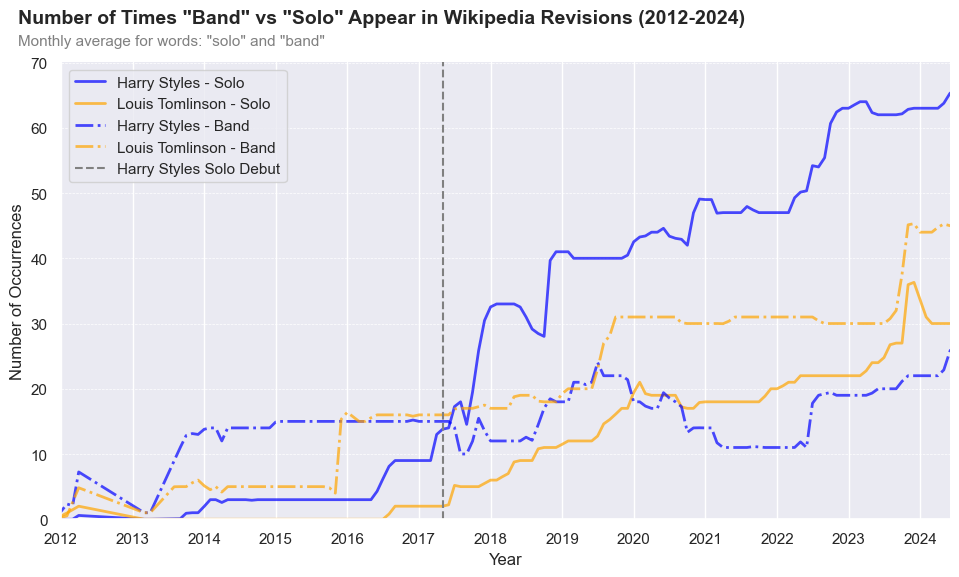

In [120]:
harry_styles['month'] = harry_styles['timestamp'].dt.to_period('M')
louis_tomlinson['month'] = louis_tomlinson['timestamp'].dt.to_period('M')

# Aggregating monthly means for "count_he" and "count_they"
agg_harry_monthly_total = harry_styles.groupby('month')[['count_solo', 'count_band']].mean()
agg_louis_monthly_total = louis_tomlinson.groupby('month')[['count_solo', 'count_band']].mean()

# 2. Plotting
plt.figure(figsize=(10,6))

# Plot "count_he" for both artists
plt.plot(agg_harry_monthly_total.index.to_timestamp(), agg_harry_monthly_total['count_solo'],
         label='Harry Styles - Solo', color='blue', linewidth=2, alpha=0.7,)
plt.plot(agg_louis_monthly_total.index.to_timestamp(), agg_louis_monthly_total['count_solo'],
         label='Louis Tomlinson - Solo', color='orange', linewidth=2, alpha=0.7)

# Plot "count_they" for both artists
plt.plot(agg_harry_monthly_total.index.to_timestamp(), agg_harry_monthly_total['count_band'],
         label='Harry Styles - Band', color='blue', linewidth=2, alpha=0.7, linestyle='-.')
plt.plot(agg_louis_monthly_total.index.to_timestamp(), agg_louis_monthly_total['count_band'],
         label='Louis Tomlinson - Band', color='orange', linewidth=2, alpha=0.7, linestyle='-.')

# Title and labels
plt.suptitle('Number of Times "Band" vs "Solo" Appear in Wikipedia Revisions (2012-2024)',
             fontsize=14, fontweight='bold', y=0.96, x=0.05, ha='left')
plt.text(0.05, 0.90, 'Monthly average for words: "solo" and "band"',
         fontsize=11, ha='left', transform=plt.gcf().transFigure, color='gray')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)

plt.axvline(pd.Timestamp('2017-05-01'), color='grey', linestyle='--', linewidth=1.5, label='Harry Styles Solo Debut')

# 3. Set x-axis formatting and limits
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start='2012-01-01', end='2024-06-01', freq='YS'))
plt.xlim(left=pd.Timestamp('2012-01-01'), right=pd.Timestamp('2024-06-01'))
plt.ylim(bottom=0)

# 5. Grid, spine adjustments, and legend
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Further Lexical Analysis

The text is too short for sentiment analysis, but there may be other meaningful comparisons we can make between Harry and Louis's careers, such as a comparative analysis of certain career term. This analysis can help track the emphasis on different career activities over time and highlight contrasts between the two artists. For example, we might find that "tour" appears more in Harry's later career than Louis's